In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1_loc = '/content/drive/Othercomputers/My Computer/졸작/unsw-nb15/UNSW-NB15_1.csv'
df2_loc = '/content/drive/Othercomputers/My Computer/졸작/unsw-nb15/UNSW-NB15_2.csv'
df3_loc = '/content/drive/Othercomputers/My Computer/졸작/unsw-nb15/UNSW-NB15_3.csv'
df4_loc = '/content/drive/Othercomputers/My Computer/졸작/unsw-nb15/UNSW-NB15_4.csv'

In [4]:
columns = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl',
           'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin','stcpb',
           'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime',
           'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
           'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 
           'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

df1=pd.read_csv(df1_loc,names = columns)
df2=pd.read_csv(df2_loc,names = columns)
df3=pd.read_csv(df3_loc,names = columns)
df4=pd.read_csv(df4_loc,names = columns)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
newdf = pd.concat([df1,df2, df3, df4], ignore_index=True)
newdf

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [6]:
newdf.fillna({'attack_cat':'normal'},inplace=True)
newdf

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,normal,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,normal,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,normal,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,normal,0


In [7]:
newdf.value_counts('attack_cat')

attack_cat
normal              2218764
Generic              215481
Exploits              44525
 Fuzzers              19195
DoS                   16353
 Reconnaissance       12228
 Fuzzers               5051
Analysis               2677
Backdoor               1795
Reconnaissance         1759
 Shellcode             1288
Backdoors               534
Shellcode               223
Worms                   174
dtype: int64

In [8]:
condition = (newdf.attack_cat == 'normal') | (newdf.attack_cat == 'DoS') 
df_dos = newdf[condition]
df_dos = df_dos.reset_index(drop=True)
df_dos

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235112,59.166.0.1,38606,149.171.126.9,80,tcp,CON,0.564998,14106,772406,31,...,,2,1,4,2,2,2,2,normal,0
2235113,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,normal,0
2235114,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,normal,0
2235115,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,normal,0


In [9]:
df_dos.value_counts('attack_cat')

attack_cat
normal    2218764
DoS         16353
dtype: int64

In [62]:
df_dos.to_csv('/content/drive/Othercomputers/My Computer/졸작/unsw-nb15/nb15_dos.csv', mode='w')

In [10]:
df_dos.isnull().sum()

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

In [58]:
df_dos.dtypes

srcip                 int64
sport                object
dstip                 int64
dsport               object
proto                 int64
state                 int64
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service               int64
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

In [61]:
df_dos = pd.to_numeric(df_dos['sport'])

ValueError: ignored

In [11]:
for columns in df_dos.columns:
  if df_dos[columns].dtypes == 'object':
    print(columns, '\n종류:', df_dos[columns].unique(), '\n개수:', df_dos[columns].nunique(), '\n')

srcip 
종류: ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '59.166.0.8' '59.166.0.9' '175.45.176.0' '10.40.182.1' '10.40.85.1'
 '175.45.176.1' '192.168.241.243' '10.40.85.30' '175.45.176.2'
 '175.45.176.3' '149.171.126.16' '149.171.126.2' '149.171.126.11'
 '149.171.126.4' '149.171.126.5' '149.171.126.17' '149.171.126.19'
 '149.171.126.9' '149.171.126.8' '149.171.126.7' '149.171.126.15'
 '149.171.126.6' '149.171.126.0' '149.171.126.1' '149.171.126.3'
 '149.171.126.13' '149.171.126.12' '149.171.126.10' '149.171.126.18'
 '127.0.0.1' '149.171.126.14' '10.40.85.10' '10.40.182.6'] 
개수: 43 

sport 
종류: [1390 33661 1464 ... 533 933 706] 
개수: 98825 

dstip 
종류: ['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.8' '149.171.126.2' '149.171.126.1' '149.171.126.3'
 '149.171.126.15' '224.0.0.5' '149.171.126.16' '192.168.241.2

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit(df_dos['srcip'])
srcip = le.transform(df_dos['srcip'])

le.fit(df_dos['dstip'])
dstip = le.transform(df_dos['dstip'])

le.fit(df_dos['proto'])
proto = le.transform(df_dos['proto'])

le.fit(df_dos['state'])
state = le.transform(df_dos['state'])

le.fit(df_dos['service'])
service = le.transform(df_dos['service'])

df_dos['srcip'] = srcip
df_dos['dstip'] = dstip
df_dos['proto'] = proto
df_dos['state'] = state
df_dos['service'] = service

In [13]:
dos_le = df_dos
dos_le

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,33,1390,24,53,120,2,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,normal,0
1,33,33661,27,1024,120,2,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,normal,0
2,39,1464,25,53,120,2,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,normal,0
3,38,3593,23,53,120,2,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,normal,0
4,36,49664,8,53,120,2,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235112,34,38606,27,80,114,2,0.564998,14106,772406,31,...,,2,1,4,2,2,2,2,normal,0
2235113,38,33094,25,43433,114,5,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,normal,0
2235114,40,20848,22,21,114,2,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,normal,0
2235115,36,21511,27,21,114,2,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,normal,0


In [14]:
dos_le = df_dos.drop(columns=['ct_flw_http_mthd', 'is_ftp_login','sport', 'dsport' ,'ct_ftp_cmd'])

In [15]:
for columns in dos_le.columns:
  if dos_le[columns].dtypes == 'object':
    print(columns, '\n종류:', dos_le[columns].unique(), '\n개수:', dos_le[columns].nunique(), '\n')

attack_cat 
종류: ['normal' 'DoS'] 
개수: 2 



In [16]:
nb15X = dos_le.drop(columns=['attack_cat','Label'])

In [17]:
nb15X

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ackdat,is_sm_ips_ports,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,33,24,120,2,0.001055,132,164,31,29,0,...,0.000000,0,0,3,7,1,3,1,1,1
1,33,27,120,2,0.036133,528,304,31,29,0,...,0.000000,0,0,2,4,2,3,1,1,2
2,39,25,120,2,0.001119,146,178,31,29,0,...,0.000000,0,0,12,8,1,2,2,1,1
3,38,23,120,2,0.001209,132,164,31,29,0,...,0.000000,0,0,6,9,1,1,1,1,1
4,36,8,120,2,0.001169,146,178,31,29,0,...,0.000000,0,0,7,9,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235112,34,27,114,2,0.564998,14106,772406,31,29,2,...,0.000139,0,0,2,1,4,2,2,2,2
2235113,38,25,114,5,0.087306,320,1828,31,29,1,...,0.000140,0,0,1,2,3,3,1,1,3
2235114,40,22,114,2,0.365058,456,346,31,29,2,...,0.000132,0,0,2,2,2,2,2,2,2
2235115,36,27,114,2,6.335154,1802,2088,31,29,7,...,0.000132,0,0,2,2,4,2,2,2,2


In [18]:
nb15Y = dos_le['attack_cat']
nb15Y= pd.DataFrame(nb15Y)
nb15Y

,attack_cat
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
2235112,normal
2235113,normal
2235114,normal
2235115,normal


In [19]:
nb15Y.value_counts('attack_cat')

attack_cat
normal    2218764
DoS         16353
dtype: int64

In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

In [21]:
dfrus_X, dfrus_Y = rus.fit_resample(nb15X, nb15Y)
dfrus_X = pd.DataFrame(dfrus_X, columns=nb15X.columns)

In [22]:
dfrus_X

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ackdat,is_sm_ips_ports,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,28,15,114,5,0.177449,1214,268,254,252,2,...,0.044904,0,1,5,2,1,1,1,1,1
1,28,15,114,5,2.592910,2082,268,254,252,6,...,0.048351,0,1,5,2,1,2,2,1,1
2,29,16,114,5,0.268272,878,1002,62,252,2,...,0.046837,0,1,3,1,1,1,1,1,1
3,28,13,114,5,0.214066,468,268,254,252,2,...,0.044702,0,1,1,1,1,1,1,1,1
4,30,12,120,6,0.000021,136,0,254,0,0,...,0.000000,0,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32701,34,25,114,5,1.599795,7816,15020,31,29,30,...,0.000102,0,0,7,8,5,2,1,1,2
32702,33,24,114,5,0.013919,1540,1644,31,29,4,...,0.000125,0,0,9,8,8,11,6,1,6
32703,34,8,120,2,0.001050,146,178,31,29,0,...,0.000000,0,0,2,2,3,3,2,2,2
32704,35,21,114,5,0.369821,8928,320,31,29,4,...,0.000115,0,0,2,2,5,2,1,1,3


In [23]:
dfrus_Y

,attack_cat
0,DoS
1,DoS
2,DoS
3,DoS
4,DoS
...,...
32701,normal
32702,normal
32703,normal
32704,normal


In [24]:
dfrus_Y.value_counts('attack_cat')

attack_cat
DoS       16353
normal    16353
dtype: int64

In [25]:
nb15rus = pd.concat([dfrus_X, dfrus_Y], axis = 1)
nb15rus

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,is_sm_ips_ports,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,28,15,114,5,0.177449,1214,268,254,252,2,...,0,1,5,2,1,1,1,1,1,DoS
1,28,15,114,5,2.592910,2082,268,254,252,6,...,0,1,5,2,1,2,2,1,1,DoS
2,29,16,114,5,0.268272,878,1002,62,252,2,...,0,1,3,1,1,1,1,1,1,DoS
3,28,13,114,5,0.214066,468,268,254,252,2,...,0,1,1,1,1,1,1,1,1,DoS
4,30,12,120,6,0.000021,136,0,254,0,0,...,0,2,1,1,1,1,1,1,1,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32701,34,25,114,5,1.599795,7816,15020,31,29,30,...,0,0,7,8,5,2,1,1,2,normal
32702,33,24,114,5,0.013919,1540,1644,31,29,4,...,0,0,9,8,8,11,6,1,6,normal
32703,34,8,120,2,0.001050,146,178,31,29,0,...,0,0,2,2,3,3,2,2,2,normal
32704,35,21,114,5,0.369821,8928,320,31,29,4,...,0,0,2,2,5,2,1,1,3,normal


In [26]:
#nb15rus.to_csv('/content/drive/Othercomputers/My Computer/졸작/unsw-nb15/NB15_dos_rus.csv', mode='w')

In [27]:
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:.9f}'.format
#pd.reset_option('display.float_format')
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(dfrus_X)

dosX = pd.DataFrame(np_scaled, columns = dfrus_X.columns)

dosX

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ackdat,is_sm_ips_ports,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.666666667,0.326086957,0.850746269,0.444444444,0.002957562,0.000102311,0.000018284,0.996078431,0.996047431,0.000475059,...,0.023782966,0.000000000,0.166666667,0.067796610,0.016949153,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
1,0.666666667,0.326086957,0.850746269,0.444444444,0.043216313,0.000176939,0.000018284,0.996078431,0.996047431,0.001425178,...,0.025608636,0.000000000,0.166666667,0.067796610,0.016949153,0.000000000,0.016949153,0.016949153,0.000000000,0.000000000
2,0.690476190,0.347826087,0.850746269,0.444444444,0.004471319,0.000073423,0.000068361,0.243137255,0.996047431,0.000475059,...,0.024806761,0.000000000,0.166666667,0.033898305,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
3,0.666666667,0.282608696,0.850746269,0.444444444,0.003567861,0.000038173,0.000018284,0.996078431,0.996047431,0.000475059,...,0.023675979,0.000000000,0.166666667,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
4,0.714285714,0.260869565,0.895522388,0.555555556,0.000000350,0.000009629,0.000000000,0.996078431,0.000000000,0.000000000,...,0.000000000,0.000000000,0.333333333,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32701,0.809523810,0.543478261,0.850746269,0.444444444,0.026663957,0.000669925,0.001024729,0.121568627,0.114624506,0.007125891,...,0.000054023,0.000000000,0.000000000,0.101694915,0.118644068,0.067796610,0.016949153,0.000000000,0.000000000,0.016129032
32702,0.785714286,0.521739130,0.850746269,0.444444444,0.000231989,0.000130340,0.000112161,0.121568627,0.114624506,0.000950119,...,0.000066205,0.000000000,0.000000000,0.135593220,0.118644068,0.118644068,0.169491525,0.084745763,0.000000000,0.080645161
32703,0.809523810,0.173913043,0.895522388,0.111111111,0.000017500,0.000010489,0.000012144,0.121568627,0.114624506,0.000000000,...,0.000000000,0.000000000,0.000000000,0.016949153,0.016949153,0.033898305,0.033898305,0.016949153,0.016949153,0.016129032
32704,0.833333333,0.456521739,0.850746269,0.444444444,0.006163847,0.000765530,0.000021832,0.121568627,0.114624506,0.000950119,...,0.000060909,0.000000000,0.000000000,0.016949153,0.016949153,0.067796610,0.016949153,0.000000000,0.000000000,0.032258065


In [28]:
dosY = dfrus_Y
dosY

,attack_cat
0,DoS
1,DoS
2,DoS
3,DoS
4,DoS
...,...
32701,normal
32702,normal
32703,normal
32704,normal


In [29]:
from sklearn.model_selection import train_test_split

xoh, xoh_test, yoh, yoh_test = train_test_split(dosX, dosY, test_size=0.2, random_state=2022)

print(xoh.shape, yoh.shape)
print(xoh_test.shape, yoh_test.shape)

(26164, 42) (26164, 1)
(6542, 42) (6542, 1)


In [30]:
xcol=list(xoh)

In [31]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rfe = RFE(estimator=clf, n_features_to_select=21, step=1)

xnewcol = []
rfe.fit(xoh, yoh)
for i in range(xoh.shape[1]):
  if rfe.support_[i] == True:
    xnewcol.append(xcol[i])
    print('Column: %s' % (xcol[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Column: srcip
Column: dstip
Column: dur
Column: sbytes
Column: dbytes
Column: sttl
Column: dttl
Column: sloss
Column: Sload
Column: Dload
Column: Dpkts
Column: smeansz
Column: Sjit
Column: Sintpkt
Column: Dintpkt
Column: tcprtt
Column: synack
Column: ct_state_ttl
Column: ct_srv_src
Column: ct_srv_dst
Column: ct_dst_src_ltm


In [32]:
print(len(xnewcol))
xnewcol

21


['srcip',
 'dstip',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'Sload',
 'Dload',
 'Dpkts',
 'smeansz',
 'Sjit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ct_state_ttl',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_src_ltm']

In [33]:
xoh_dos = rfe.transform(xoh)
xoh_dos.shape

(26164, 21)

In [34]:
xoh_dos

array([[6.90476190e-01, 2.17391304e-01, 1.33336869e-07, ...,
        5.08474576e-02, 5.08474576e-02, 4.83870968e-02],
       [6.90476190e-01, 3.26086957e-01, 7.40247962e-03, ...,
        1.69491525e-02, 1.69491525e-02, 1.61290323e-02],
       [9.52380952e-01, 4.56521739e-01, 8.16471650e-04, ...,
        6.77966102e-02, 3.38983051e-02, 0.00000000e+00],
       ...,
       [8.57142857e-01, 5.65217391e-01, 1.68960147e-02, ...,
        1.69491525e-02, 1.69491525e-02, 0.00000000e+00],
       [7.14285714e-01, 3.26086957e-01, 2.66805408e-02, ...,
        1.69491525e-02, 0.00000000e+00, 0.00000000e+00],
       [3.57142857e-01, 6.73913043e-01, 1.50003978e-07, ...,
        5.08474576e-01, 5.08474576e-01, 4.83870968e-01]])

In [35]:
xoh_rfedos = pd.DataFrame(xoh_dos, columns=xnewcol)
xoh_rfedos

,srcip,dstip,dur,sbytes,dbytes,sttl,dttl,sloss,Sload,Dload,...,smeansz,Sjit,Sintpkt,Dintpkt,tcprtt,synack,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_src_ltm
0,0.690476190,0.217391304,0.000000133,0.000015132,0.000000000,0.996078431,0.000000000,0.000000000,0.018982535,0.000000000,...,0.052851182,0.000000000,0.000000133,0.000000000,0.000000000,0.000000000,0.333333333,0.050847458,0.050847458,0.048387097
1,0.690476190,0.326086957,0.007402480,0.001493059,0.000024151,0.996078431,0.996047431,0.001662708,0.000056489,0.000200825,...,0.588317107,0.001311776,0.000309699,0.001156971,0.034726721,0.021118270,0.166666667,0.016949153,0.016949153,0.016129032
2,0.952380952,0.456521739,0.000816472,0.000316220,0.003115532,0.121568627,0.114624506,0.001662708,0.000112933,0.264028456,...,0.025034771,0.000061621,0.000013283,0.000015703,0.000287991,0.000228819,0.000000000,0.067796610,0.033898305,0.000000000
3,0.690476190,0.369565217,0.000000100,0.000015132,0.000000000,0.996078431,0.000000000,0.000000000,0.025310046,0.000000000,...,0.052851182,0.000000000,0.000000100,0.000000000,0.000000000,0.000000000,0.333333333,0.186440678,0.186440678,0.209677419
4,0.904761905,0.173913043,0.000281541,0.000225429,0.001637656,0.121568627,0.114624506,0.001662708,0.000232214,0.399577797,...,0.027121001,0.000000000,0.000006910,0.000007951,0.000232897,0.000235064,0.000000000,0.084745763,0.067796610,0.064516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26159,0.666666667,0.282608696,0.006987985,0.000029232,0.000018284,0.996078431,0.996047431,0.000237530,0.000001155,0.000153720,...,0.015299026,0.003551801,0.000998244,0.001468738,0.033256715,0.021075004,0.166666667,0.016949153,0.033898305,0.016129032
26160,0.738095238,0.413043478,0.000000017,0.000015132,0.000000000,0.996078431,0.000000000,0.000000000,0.151860281,0.000000000,...,0.052851182,0.000000000,0.000000017,0.000000000,0.000000000,0.000000000,0.333333333,0.084745763,0.084745763,0.080645161
26161,0.857142857,0.565217391,0.016896015,0.000142720,0.000693705,0.121568627,0.114624506,0.000712589,0.000002343,0.002725844,...,0.066759388,0.008395746,0.001299127,0.001216468,0.000245419,0.000244877,0.000000000,0.016949153,0.016949153,0.000000000
26162,0.714285714,0.326086957,0.026680541,0.000072220,0.000113662,0.996078431,0.996047431,0.000475059,0.000000738,0.000269606,...,0.043115438,0.010644112,0.002964386,0.003320533,0.100916026,0.060641541,0.166666667,0.016949153,0.000000000,0.000000000


In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(xoh, yoh)

yoh_preds = xgb.predict(xoh_test)

print('Accuracy: %.2f' % accuracy_score(yoh_test, yoh_preds))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.00


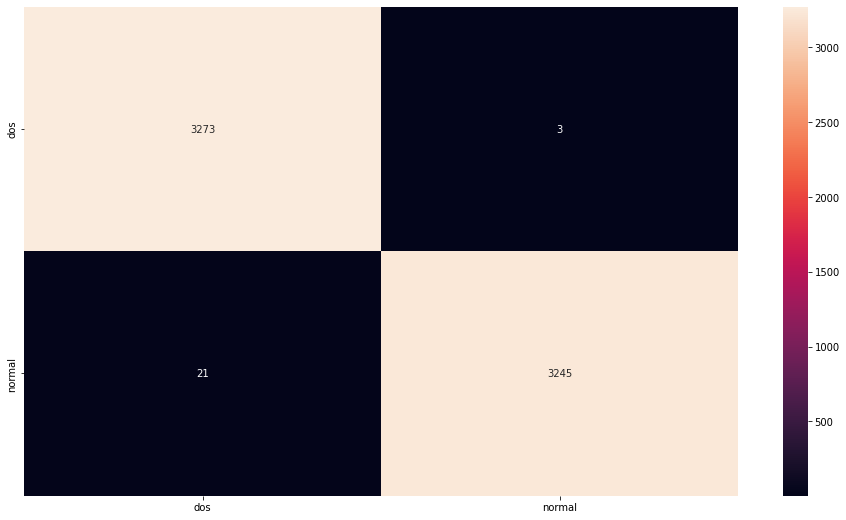

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yoh_test, yoh_preds)

plt.figure(figsize=(16, 9))
sns.heatmap(
    cm,
    annot=True, 
    fmt='g',
    xticklabels=['dos', 'normal'],
    yticklabels=['dos', 'normal']
)
plt.show()

In [42]:
pip install eli5

     |████████████████████████████████| 106 kB 10.9 MB/s 


In [43]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state=1).fit(xoh_test, yoh_test)
eli5.show_weights(perm, feature_names = xoh_test.columns.tolist())

Weight,Feature
0.3911 ± 0.0105,sttl
0.0034 ± 0.0001,Sintpkt
0.0031 ± 0.0007,ct_state_ttl
0.0019 ± 0.0001,synack
0.0015 ± 0.0004,proto
0.0011 ± 0.0005,sbytes
0.0009 ± 0.0007,dbytes
0.0008 ± 0.0004,service
0.0006 ± 0.0003,ct_srv_dst
0.0005 ± 0.0005,smeansz
